In [1]:
!pip install wordcloud

In [2]:
%matplotlib inline
from wordcloud import WordCloud
import pandas as pd
import string
import seaborn as sns
import matplotlib.pyplot as plt
import collections
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import numpy as np

In [3]:
# load dataset
df = pd.read_csv("reviews_data.csv")

df.head()

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         850 non-null    object 
 1   location     850 non-null    object 
 2   Date         850 non-null    object 
 3   Rating       705 non-null    float64
 4   Review       850 non-null    object 
 5   Image_Links  850 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.0+ KB


In [5]:
df = df[np.logical_and(df["Rating"].isna() == False , df["Review"] != "No Review Text")]

In [6]:
df.head()

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


In [7]:
df = df.drop(columns=["Image_Links"])

In [8]:
df['clean_review'] = df['Review'].str.lower()

df['clean_review']= df['clean_review'].str.replace('[^\w\s]','')
df.head()

stop = ['the', 'a', 'this', 'that', 'to', 'is', 'am', 'was', 'were', 'be', 'being', 'been','she','he','it']

df['clean_review'] = df['clean_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

df.head()

<>:3: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\w'
C:\Users\gokay.sirin\AppData\Local\Temp\ipykernel_15844\1585379360.py:3: SyntaxWarning: invalid escape sequence '\w'
  df['clean_review']= df['clean_review'].str.replace('[^\w\s]','')


,name,location,Date,Rating,Review,clean_review
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,amber and ladonna at starbucks on southwest pa...
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,** at starbucks by fire station on 436 in alta...
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,i just wanted go out of my way recognize starb...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,me and my friend at starbucks and my card didn...
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,i’m on kick of drinking 5 cups of warm water. ...


In [9]:
#night, day, and other time-related words
good = ['good', 'great', 'amazing', 'delicious', 'fantastic', 'excellent', 'tasty', 'fresh', 'friendly', 'clean', 'perfect', 'cozy', 'love', 'favorite', 'nice', 'satisfying', 'best', 'smooth']
bad = ['bad', 'terrible', 'horrible', 'awful', 'poor', 'disgusting', 'dirty', 'cold', 'stale', 'rude', 'slow', 'uncomfortable', 'disappointing', 'worst', 'burnt', 'loud', 'crowded']
appreciation = ['thank', 'thanks', 'appreciate', 'grateful', 'love', 'wonderful', 'pleasant', 'kind', 'helpful', 'amazing', 'fantastic', 'awesome', 'happy', 'commend', 'shoutout', 'smile', 'best', 'positive']
complaint = ['complain', 'complaint', 'issue', 'problem', 'disappoint', 'wrong', 'refund', 'cold', 'burnt', 'late', 'delay', 'bad', 'slow', 'dirty', 'rude', 'crowded', 'overpriced', 'unavailable', 'not', 'negative']


#create a regular expression string for each list of words
good_regex = '|'.join(good)
bad_regex = '|'.join(bad)
appreciation_regex = '|'.join(appreciation)
complaint_regex = '|'.join(complaint)


#create a new column for each category of words
df['good'] =df['clean_review'].str.contains(good_regex)
df['bad'] =df['clean_review'].str.contains(bad_regex)
df['appreciation'] =df['clean_review'].str.contains(appreciation_regex)
df['complaint'] =df['clean_review'].str.contains(complaint_regex)

#count the number of times each category of word appears in thedf
good_count = sum(df['good'])
bad_count = sum(df['bad'])
appreciation_count = sum(df['appreciation'])
complaint_count = sum(df['complaint'])


#print the count of each word category
print("good words: ", good_count)
print("bad words: ", bad_count)
print("appreciation words: ", appreciation_count)
print("complaint words: ", complaint_count)

#inspect the first few rows
df.head()

good words:  275
bad words:  246
appreciation words:  176
complaint words:  518


,name,location,Date,Rating,Review,clean_review,good,bad,appreciation,complaint
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,amber and ladonna at starbucks on southwest pa...,False,False,True,False
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,** at starbucks by fire station on 436 in alta...,True,True,True,True
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,i just wanted go out of my way recognize starb...,False,True,True,True
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,me and my friend at starbucks and my card didn...,True,False,True,False
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,i’m on kick of drinking 5 cups of warm water. ...,True,False,True,False


In [10]:
df['Year'] = df['Date'].str.extract(r'(\d{4})')
yearly_reviews = df.groupby('Year').sum().reset_index()
yearly_reviews.head()

,Year,name,location,Date,Rating,Review,clean_review,good,bad,appreciation,complaint
0,2010,Kenneth,"Beecher, IL","Reviewed Feb. 6, 2010",5.0,I found the coffee at Starbucks overrated and ...,i found coffee at starbucks overrated and tast...,1,0,0,0
1,2011,BlancaBellaRachellKimRaniaJudithNatasaRaeJaneD...,"Bakersfield, CASacramento, CAWest Sacramento, ...","Reviewed Dec. 6, 2011Reviewed Dec. 5, 2011Revi...",26.0,I'm currently a college student and I make it ...,i'm currently college student and i make routi...,5,7,1,14
2,2012,ErikaJ MAnonyLindaMariaJaneCoreyAnnonymouslydi...,"Chicago, ILSeattle, WAJupiter, FLTemecula, CAS...","Reviewed Dec. 27, 2012Reviewed Dec. 21, 2012Re...",86.0,I have lived in Old Irving Park for over 5 yea...,i have lived in old irving park for over 5 yea...,21,19,15,40
3,2013,AraceliKrystallenaUmiDavidJoffreJenMaryseSteve...,"Mission, TXHollywood, FLBloomington, MNPhoenix...","Reviewed Dec. 30, 2013Reviewed Dec. 10, 2013Re...",33.0,"The other day, Dec. 28th 2013, my son and I bo...","other day, dec. 28th 2013, my son and i bought...",7,8,5,20
4,2014,HeidrunLauraSara ShannaDesiMylarapuKellyEvaAsh...,"Stephens City, VAFresno, CAApex, NCAcme, PAMac...","Reviewed Dec. 21, 2014Reviewed Dec. 20, 2014Re...",92.0,"Starbucks french roast - Pure terrible, taste ...","starbucks french roast - pure terrible, taste ...",20,16,12,54


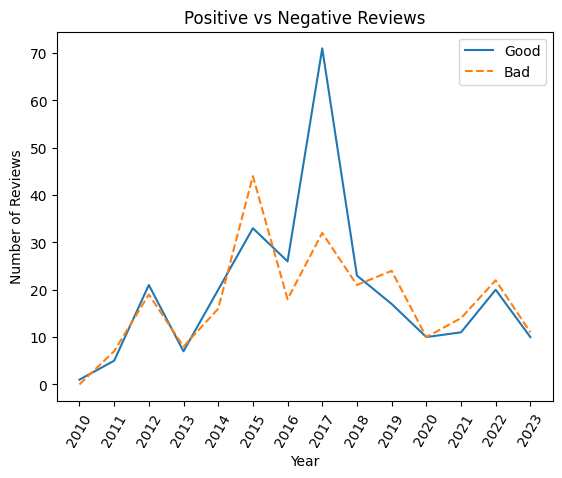

In [11]:
plt.plot(yearly_reviews["Year"], yearly_reviews["good"], label="Good", linestyle="-")
plt.plot(yearly_reviews["Year"], yearly_reviews["bad"], label="Bad", linestyle="--")  
plt.title("Positive vs Negative Reviews")
plt.xticks(rotation=60)
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.legend()
plt.show()

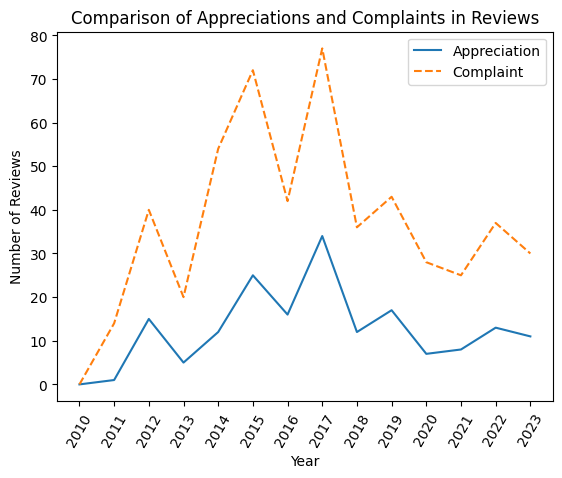

In [12]:
plt.plot(yearly_reviews["Year"], yearly_reviews["appreciation"], label="Appreciation", linestyle="-")
plt.plot(yearly_reviews["Year"], yearly_reviews["complaint"], label="Complaint", linestyle="--")  
plt.title("Comparison of Appreciations and Complaints in Reviews")
plt.xticks(rotation=60)
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.legend()
plt.show()

In [13]:
yearly_reviews['reviews_tok'] = yearly_reviews['clean_review'].str.split(' ')

In [14]:
yearly_reviews.head()

,Year,name,location,Date,Rating,Review,clean_review,good,bad,appreciation,complaint,reviews_tok
0,2010,Kenneth,"Beecher, IL","Reviewed Feb. 6, 2010",5.0,I found the coffee at Starbucks overrated and ...,i found coffee at starbucks overrated and tast...,1,0,0,0,"[i, found, coffee, at, starbucks, overrated, a..."
1,2011,BlancaBellaRachellKimRaniaJudithNatasaRaeJaneD...,"Bakersfield, CASacramento, CAWest Sacramento, ...","Reviewed Dec. 6, 2011Reviewed Dec. 5, 2011Revi...",26.0,I'm currently a college student and I make it ...,i'm currently college student and i make routi...,5,7,1,14,"[i'm, currently, college, student, and, i, mak..."
2,2012,ErikaJ MAnonyLindaMariaJaneCoreyAnnonymouslydi...,"Chicago, ILSeattle, WAJupiter, FLTemecula, CAS...","Reviewed Dec. 27, 2012Reviewed Dec. 21, 2012Re...",86.0,I have lived in Old Irving Park for over 5 yea...,i have lived in old irving park for over 5 yea...,21,19,15,40,"[i, have, lived, in, old, irving, park, for, o..."
3,2013,AraceliKrystallenaUmiDavidJoffreJenMaryseSteve...,"Mission, TXHollywood, FLBloomington, MNPhoenix...","Reviewed Dec. 30, 2013Reviewed Dec. 10, 2013Re...",33.0,"The other day, Dec. 28th 2013, my son and I bo...","other day, dec. 28th 2013, my son and i bought...",7,8,5,20,"[other, day,, dec., 28th, 2013,, my, son, and,..."
4,2014,HeidrunLauraSara ShannaDesiMylarapuKellyEvaAsh...,"Stephens City, VAFresno, CAApex, NCAcme, PAMac...","Reviewed Dec. 21, 2014Reviewed Dec. 20, 2014Re...",92.0,"Starbucks french roast - Pure terrible, taste ...","starbucks french roast - pure terrible, taste ...",20,16,12,54,"[starbucks, french, roast, -, pure, terrible,,..."


In [15]:
word_list = [word for list_ in yearly_reviews['reviews_tok'] for word in list_]

word_frequency = collections.Counter(word_list)
word_frequency = sorted(word_frequency.items(), key=lambda x: x[1], reverse=True)
word_frequency

[('i', 2393),
 ('and', 2041),
 ('my', 945),
 ('of', 850),
 ('in', 789),
 ('starbucks', 737),
 ('for', 679),
 ('they', 593),
 ('at', 534),
 ('have', 534),
 ('on', 499),
 ('not', 487),
 ('with', 437),
 ('me', 416),
 ('coffee', 370),
 ('but', 322),
 ('you', 311),
 ('are', 293),
 ('so', 275),
 ('had', 260),
 ('when', 254),
 ('get', 250),
 ('their', 243),
 ('customer', 234),
 ('as', 220),
 ('from', 208),
 ('or', 192),
 ('like', 192),
 ('one', 192),
 ('we', 186),
 ('no', 185),
 ('service', 184),
 ('go', 184),
 ('there', 182),
 ('very', 182),
 ('if', 181),
 ('out', 179),
 ('about', 175),
 ('all', 173),
 ('store', 171),
 ('drink', 166),
 ('would', 164),
 ('her', 161),
 ('has', 160),
 ('an', 158),
 ('time', 157),
 ('will', 149),
 ('your', 147),
 ('just', 146),
 ('said', 145),
 ('went', 144),
 ('because', 143),
 ('order', 143),
 ('what', 143),
 ('up', 141),
 ('told', 136),
 ('always', 134),
 ('card', 133),
 ('do', 128),
 ('never', 126),
 ('asked', 124),
 ('got', 122),
 ('by', 119),
 ('only', 119

In [16]:
yearly_reviews.drop(["Rating","Date","location","name"],axis=1,inplace=True)

In [17]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gokay.sirin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [18]:
sia = SentimentIntensityAnalyzer()

In [19]:
yearly_reviews['polarity'] = yearly_reviews['clean_review'].apply(lambda x: sia.polarity_scores(x))
yearly_reviews.head()

,Year,Review,clean_review,good,bad,appreciation,complaint,reviews_tok,polarity
0,2010,I found the coffee at Starbucks overrated and ...,i found coffee at starbucks overrated and tast...,1,0,0,0,"[i, found, coffee, at, starbucks, overrated, a...","{'neg': 0.044, 'neu': 0.726, 'pos': 0.23, 'com..."
1,2011,I'm currently a college student and I make it ...,i'm currently college student and i make routi...,5,7,1,14,"[i'm, currently, college, student, and, i, mak...","{'neg': 0.101, 'neu': 0.829, 'pos': 0.07, 'com..."
2,2012,I have lived in Old Irving Park for over 5 yea...,i have lived in old irving park for over 5 yea...,21,19,15,40,"[i, have, lived, in, old, irving, park, for, o...","{'neg': 0.113, 'neu': 0.786, 'pos': 0.101, 'co..."
3,2013,"The other day, Dec. 28th 2013, my son and I bo...","other day, dec. 28th 2013, my son and i bought...",7,8,5,20,"[other, day,, dec., 28th, 2013,, my, son, and,...","{'neg': 0.101, 'neu': 0.827, 'pos': 0.072, 'co..."
4,2014,"Starbucks french roast - Pure terrible, taste ...","starbucks french roast - pure terrible, taste ...",20,16,12,54,"[starbucks, french, roast, -, pure, terrible,,...","{'neg': 0.096, 'neu': 0.792, 'pos': 0.113, 'co..."


In [20]:
yearly_reviews[['neg', 'neu', 'pos', 'compound']] = yearly_reviews['polarity'].apply(pd.Series)
yearly_reviews.drop('polarity', axis=1)

,Year,Review,clean_review,good,bad,appreciation,complaint,reviews_tok,neg,neu,pos,compound
0,2010,I found the coffee at Starbucks overrated and ...,i found coffee at starbucks overrated and tast...,1,0,0,0,"[i, found, coffee, at, starbucks, overrated, a...",0.044,0.726,0.230,0.8957
1,2011,I'm currently a college student and I make it ...,i'm currently college student and i make routi...,5,7,1,14,"[i'm, currently, college, student, and, i, mak...",0.101,0.829,0.070,-0.9957
2,2012,I have lived in Old Irving Park for over 5 yea...,i have lived in old irving park for over 5 yea...,21,19,15,40,"[i, have, lived, in, old, irving, park, for, o...",0.113,0.786,0.101,-0.9960
3,2013,"The other day, Dec. 28th 2013, my son and I bo...","other day, dec. 28th 2013, my son and i bought...",7,8,5,20,"[other, day,, dec., 28th, 2013,, my, son, and,...",0.101,0.827,0.072,-0.9975
4,2014,"Starbucks french roast - Pure terrible, taste ...","starbucks french roast - pure terrible, taste ...",20,16,12,54,"[starbucks, french, roast, -, pure, terrible,,...",0.096,0.792,0.113,0.9987
5,2015,I went into your Starbucks store located at: 1...,i went into your starbucks store located at: 1...,33,44,25,72,"[i, went, into, your, starbucks, store, locate...",0.122,0.776,0.102,-0.9991
6,2016,"I went this evening with my little kids, husba...","i went evening with my little kids, husband. w...",26,18,16,42,"[i, went, evening, with, my, little, kids,, hu...",0.092,0.780,0.129,0.9997
7,2017,It was a good introduction to the world of cof...,good introduction world of coffee beyond folge...,71,32,34,77,"[good, introduction, world, of, coffee, beyond...",0.093,0.735,0.172,1.0000
8,2018,"Starbucks Phipps Plaza, Atlanta store demonstr...","starbucks phipps plaza, atlanta store demonstr...",23,21,12,36,"[starbucks, phipps, plaza,, atlanta, store, de...",0.118,0.758,0.125,0.9908
9,2019,My daughter ended up in the ER for two days wi...,my daughter ended up in er for two days with s...,17,24,17,43,"[my, daughter, ended, up, in, er, for, two, da...",0.126,0.747,0.128,0.7657


In [21]:
yearly_reviews.head()

,Year,Review,clean_review,good,bad,appreciation,complaint,reviews_tok,polarity,neg,neu,pos,compound
0,2010,I found the coffee at Starbucks overrated and ...,i found coffee at starbucks overrated and tast...,1,0,0,0,"[i, found, coffee, at, starbucks, overrated, a...","{'neg': 0.044, 'neu': 0.726, 'pos': 0.23, 'com...",0.044,0.726,0.230,0.8957
1,2011,I'm currently a college student and I make it ...,i'm currently college student and i make routi...,5,7,1,14,"[i'm, currently, college, student, and, i, mak...","{'neg': 0.101, 'neu': 0.829, 'pos': 0.07, 'com...",0.101,0.829,0.070,-0.9957
2,2012,I have lived in Old Irving Park for over 5 yea...,i have lived in old irving park for over 5 yea...,21,19,15,40,"[i, have, lived, in, old, irving, park, for, o...","{'neg': 0.113, 'neu': 0.786, 'pos': 0.101, 'co...",0.113,0.786,0.101,-0.9960
3,2013,"The other day, Dec. 28th 2013, my son and I bo...","other day, dec. 28th 2013, my son and i bought...",7,8,5,20,"[other, day,, dec., 28th, 2013,, my, son, and,...","{'neg': 0.101, 'neu': 0.827, 'pos': 0.072, 'co...",0.101,0.827,0.072,-0.9975
4,2014,"Starbucks french roast - Pure terrible, taste ...","starbucks french roast - pure terrible, taste ...",20,16,12,54,"[starbucks, french, roast, -, pure, terrible,,...","{'neg': 0.096, 'neu': 0.792, 'pos': 0.113, 'co...",0.096,0.792,0.113,0.9987


In [22]:
pos = sum(yearly_reviews['pos'])
neg = sum(yearly_reviews['neg'])
compound = sum(yearly_reviews['compound'])

print("positive: ", pos)
print("negative: ", neg)
print("compound: ", compound)

positive:  1.765
negative:  1.413
compound:  5.2902000000000005


In [23]:
average_compound = yearly_reviews['compound'].mean()
average_pos = yearly_reviews['pos'].mean()
average_neg = yearly_reviews['neg'].mean()
print(f"Average compound: {average_compound}, Average pos: {average_pos}, Average neg: {average_neg}")


Average compound: 0.3778714285714286, Average pos: 0.12607142857142856, Average neg: 0.10092857142857144


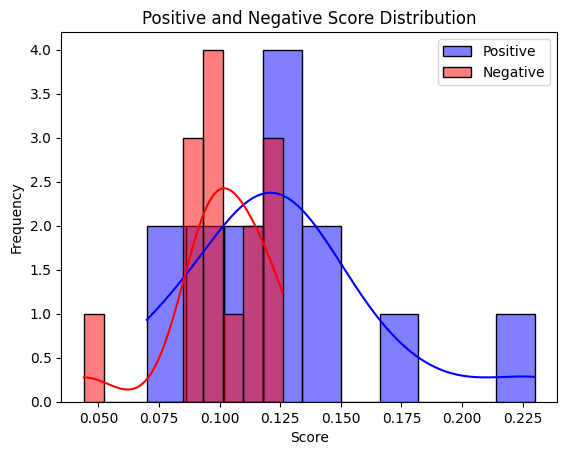

In [24]:
sns.histplot(yearly_reviews['pos'], bins=10, kde=True, color='blue', label='Positive')
sns.histplot(yearly_reviews['neg'], bins=10, kde=True, color='red', label='Negative')
plt.legend()
plt.title("Positive and Negative Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()


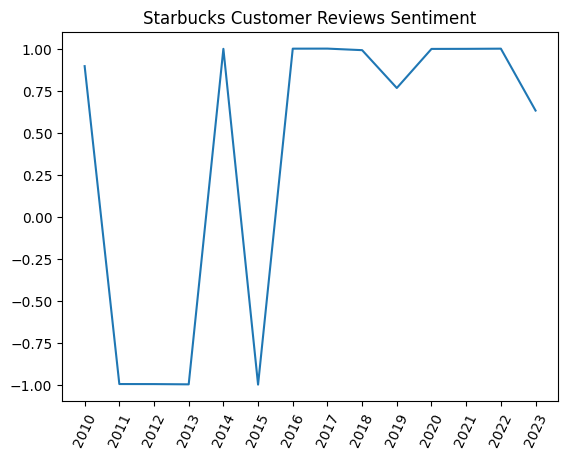

In [25]:
yearly_sentiment = yearly_reviews.groupby('Year').sum().reset_index()
plt.plot(yearly_sentiment['Year'], yearly_sentiment['compound'])
plt.title("Starbucks Customer Reviews Sentiment")
plt.xticks(rotation=65)
plt.show()

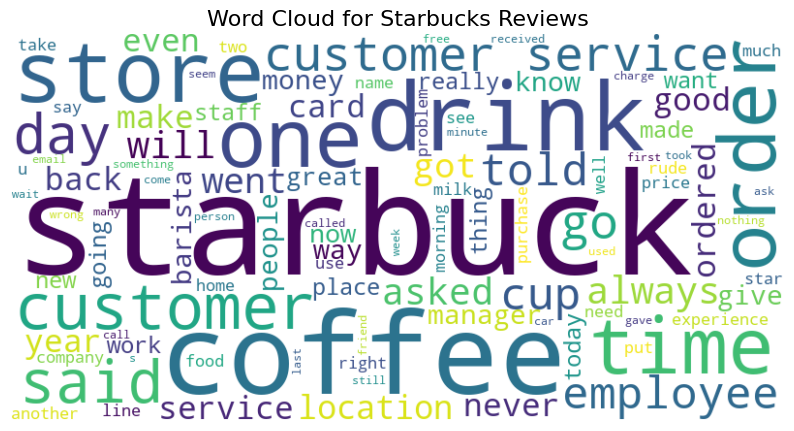

In [26]:
all_words = ' '.join([word for tokens in yearly_reviews['reviews_tok'] for word in tokens])

# Kelime haritasını oluştur
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=100
).generate(all_words)

# Kelime haritasını görselleştir
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Starbucks Reviews", fontsize=16)
plt.show()